# Gerg2008

In `yaeos` the multifluid equation $GERG2008$ residual term is implemented.

In [1]:
import yaeos
import numpy as np
import matplotlib.pyplot as plt

The `GERG2008` object is instantiated by providing a list of the components
desired to include. The available components are:

- `methane`
- `nitrogen`
- `carbon dioxide`
- `ethane`
- `propane`
- `n-butane`
- `isobutane`
- `n-pentane`
- `isopentane`
- `n-hexane`
- `n-heptane`
- `n-octane`
- `nonane`
- `decane`
- `hydrogen`
- `oxygen`
- `carbon monoxide`
- `water`
- `hydrogen sulfide`
- `helium`
- `argon`


For example, we will calculate the phase envelope for the ternary system of 
methane, n-butane and decane.

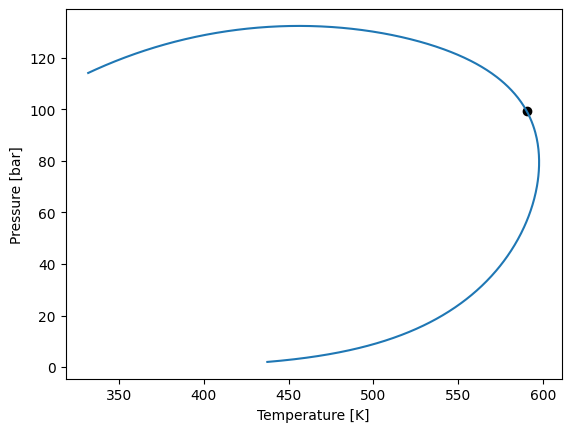

In [2]:
# Define the model to use
model = yaeos.GERG2008(["methane", "n-butane", "decane"])

# Calculate the phase envelope at a specific composition
z = [0.4, 0.2, 0.4]
env = model.phase_envelope_pt(z, kind="dew", max_points=800, t0=400, p0=2)
env.plot()

## Things to be careful about


### Multiple volume roots

Due to it's multiparametric nature, the GERG2008 can also be the source of
unexpected and undesired errors in modelling. One of the most common cases is
the precense of multiple unrealistic volume roots. In this example we show 
how the isotherm of pure n-Heptane can present an unrealistic root.

When we draw the isotherm at $350~K$ we can see that there are three possible
volume roots for pressures from $0 bar$ to near $250 bar$. The middle root does
not satisfy the mechanically stability criteria ($dP/dV$ should be negative) but
the other two roots do. But, if we pay attention to the root at higher molar
volumes, we can see that it is an unrealistic vapor root that's just an artifact
of the complexity of the GERG2008 equation, and it should not be taken into
account.

In `yaeos`, we use the $SRK$ equation of state to initialize liquid and vapor
volumes, so in most cases we should not end on those unrealisic roots. This is
shown in this example, where both the (initialized as) liquid and vapor roots
end up in the realistic liquid root. But extra care should be taken when
calculating these kind of roots, because this method is not perfect.


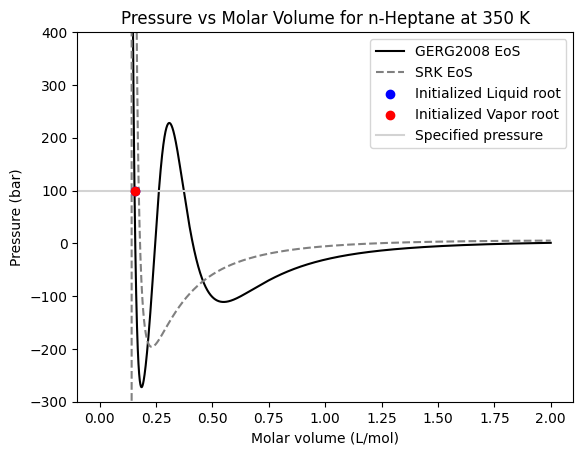

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import yaeos

model = yaeos.GERG2008(["n-heptane"])

Tc =  [540.2]
Pc =  [27.4]
w =  [0.349469]

srk = yaeos.SoaveRedlichKwong(Tc, Pc, w)

T = 350  # Temperature in Kelvin
P = 100  # Pressure in bar

# Define a range of molar volumes to calculate pressures
vs = np.linspace(1e-3, 2, 10000)

# Calculate pressures for the specified molar volumes using the GERG2008 model
ps = [model.pressure([1], v, T) for v in vs]

# Calculate pressures using the SRK EoS for comparison
ps_srk = [srk.pressure([1], v, T) for v in vs]

# Calculate the liquid and vapor roots at the specified pressure and temperature
v_liq = model.volume([1], P, T, root="liquid")
v_vap = model.volume([1], P, T, root="vapor")

# Plotting the results
plt.ylim(-300, 400)
plt.plot(vs, ps, color="black", label="GERG2008 EoS")
plt.plot(vs, ps_srk, linestyle="--", color="gray", label="SRK EoS")

plt.scatter(v_liq, P, color="blue", label="Initialized Liquid root", zorder=10)
plt.scatter(v_vap, P, color="red", label="Initialized Vapor root", zorder=10)

plt.axhline(P, color="lightgray", linestyle="-", label="Specified pressure")
plt.xlabel("Molar volume (L/mol)")
plt.ylabel("Pressure (bar)")
plt.title("Pressure vs Molar Volume for n-Heptane at {T} K".format(T=T))
plt.legend()
plt.show()